# Analysis of Datasets

In this file we look look at the training datasets to confirm what was written in the related works sections and to find any obvious patterns in the questions to more directly hardcode in what type of answer to give

In [79]:
import json
import matplotlib.pyplot as plt
import nltk
import re

from collections import Counter

## Load Data

Loads the data and saves it as a list of dictionaries

In [80]:
def loadData(filelocation):
    """Loads a json training dataset and returns it as a list of dictionaries.
    The keys are:

    'ID', 'question', 'category', 'type'
    """
    with open(filelocation, 'r', encoding='utf-8') as file:
        return json.load(file)

def preprocess(doc):
    """Preprocesses a document
    Taken from A2.1 assignment
    """
    ps = nltk.stem.PorterStemmer()
    return [ps.stem(term) for term in re.sub(r"[^\w]|_", " ", doc).lower().split()]

In [81]:
data = loadData('../datasets/DBpedia/smarttask_dbpedia_train.json') + loadData('../datasets/Wikidata/lcquad2_anstype_wikidata_train.json')

for i, j in enumerate(data):
    data[i]['question'] = ' '.join(preprocess(str(j['question'])))

## Category Analysis Functions

These functions are used for category analysis and sorting the results from it

In [82]:
def mostFreqQwordCategory(data, category):
    """Takes a dataset and a category and returns the first word of every question
    """
    firstWordList = []
    for i in data:
        if i['category'] == category:
            firstWordList.append(i['question'].lower().split()[0])
    return firstWordList

def CountFrequency(list):
    """Takes a list and returns it as a sorted dictionary where the key is the item and the value is the frequency
    """
    freq = {}
    for item in sortListFreq(list):
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    return freq

def sortListFreq(list):
    """Sorts a list on frequency
    """
    counts = Counter(list)
    return sorted(list, key=counts.get, reverse=True)

def topXOfList(list, x):
    """Returns the X most common elements in a list"""
    counts = Counter(list)
    return counts.most_common(x)

def convertTupToDict(tuple):
    """Converts a list of tuples into a dictionary"""
    dict = {}
    for i, j in tuple:
        dict.setdefault(i, j)
    return dict
    
def mostFreqQwordCategory(data, category):
    """Takes a dataset and a category and returns the first word of every question
    """
    firstWordList = []
    for i in data:
        if i['category'] == category:
            try:
                firstWordList.append(str(i['question']).lower().split()[0])
            except:
                ...
    return firstWordList

def CountFrequency(list):
    """Takes a list and returns it as a sorted dictionary where the key is the item and the value is the frequency
    """
    freq = {}
    for item in sortListFreq(list):
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    return freq

def sortListFreq(list):
    """Sorts a list on frequency
    """
    counts = Counter(list)
    return sorted(list, key=counts.get, reverse=True)

def topXOfList(list, x):
    """Returns the X most common elements in a list"""
    counts = Counter(list)
    return counts.most_common(x)

def convertTupToDict(tuple):
    """Converts a list of tuples into a dictionary"""
    dict = {}
    for i, j in tuple:
        dict.setdefault(i, j)
    return dict

# Finding the question words
Here we will plot the most common first words of every category to find which words to look out for

## Boolean

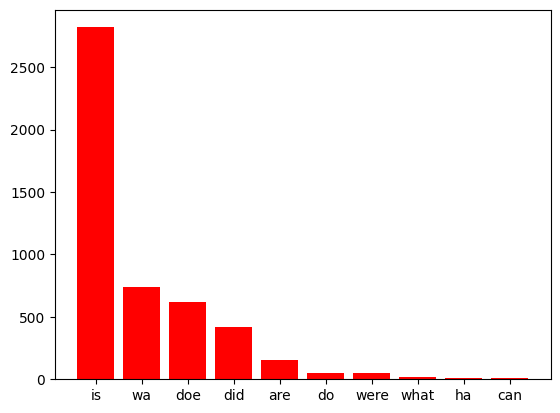

In [83]:
DataBoolTopXDict = convertTupToDict(topXOfList(mostFreqQwordCategory(data, 'boolean'), 10))

plt.bar(list(DataBoolTopXDict.keys()),list(DataBoolTopXDict.values()), color='r')
plt.show()

## Literals

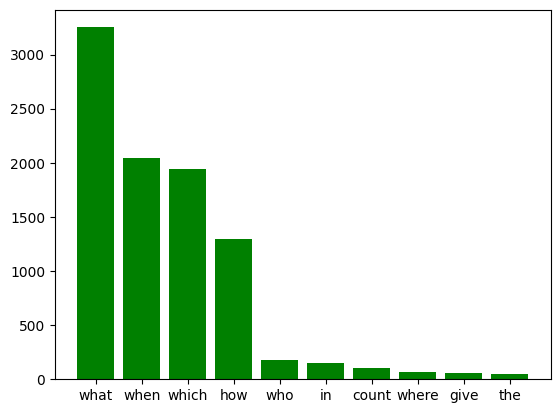

In [84]:
DataBoolTopXDict = convertTupToDict(topXOfList(mostFreqQwordCategory(data, 'literal'), 10))

plt.bar(list(DataBoolTopXDict.keys()),list(DataBoolTopXDict.values()), color='g')
plt.show()

## Resources

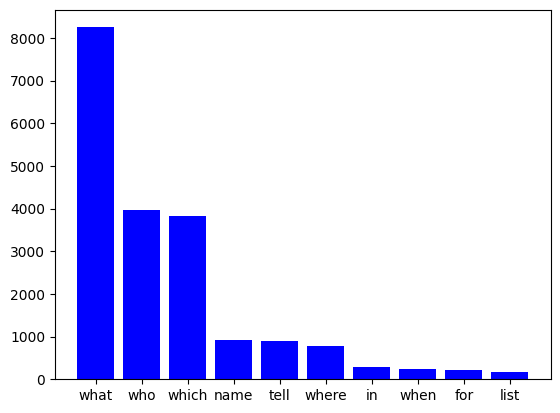

In [85]:
DataBoolTopXDict = convertTupToDict(topXOfList(mostFreqQwordCategory(data, 'resource'), 10))

plt.bar(list(DataBoolTopXDict.keys()),list(DataBoolTopXDict.values()), color='b')
plt.show()

# First Word Category frequency

Here we will look at the words found previously and see how frequently they appear in each category

## Functions

In [86]:
def checkQword(data, word):
    """Checks how often a word comes up in a given category
    """
    categoryList = []
    for i in data:
        try:
            if str(i['question']).lower().split()[0] == word:
                categoryList.append(i['category'].lower())
        except:
            ...
    return categoryList

def categoryPercentages(dict):
    """Calculates how often 
    """
    retdict = {}
    total = sum(list(dict.values()))
    for i, j in dict.items():
        retdict[i] = (j/total)
    return retdict

## Checking the word frequency

In [90]:
print("is %: ", categoryPercentages(CountFrequency(checkQword(data, 'is'))))
print("wa %: ", categoryPercentages(CountFrequency(checkQword(data, 'wa'))))
print("doe %: ", categoryPercentages(CountFrequency(checkQword(data, 'doe'))))
print("did %: ", categoryPercentages(CountFrequency(checkQword(data, 'did'))))
print("are %: ", categoryPercentages(CountFrequency(checkQword(data, 'are'))))
print("do %: ", categoryPercentages(CountFrequency(checkQword(data, 'do'))))
print("were %: ", categoryPercentages(CountFrequency(checkQword(data, 'were'))))
print("what %: ", categoryPercentages(CountFrequency(checkQword(data, 'what'))))
print("ha %: ", categoryPercentages(CountFrequency(checkQword(data, 'ha'))))
print("can %: ", categoryPercentages(CountFrequency(checkQword(data, 'can'))))
print()
print("when %: ", categoryPercentages(CountFrequency(checkQword(data, 'when'))))
print("which %: ", categoryPercentages(CountFrequency(checkQword(data, 'which'))))
print("how %: ", categoryPercentages(CountFrequency(checkQword(data, 'how'))))
print("who %: ", categoryPercentages(CountFrequency(checkQword(data, 'who'))))
print("in %: ", categoryPercentages(CountFrequency(checkQword(data, 'in'))))
print("count %: ", categoryPercentages(CountFrequency(checkQword(data, 'count'))))
print("where %: ", categoryPercentages(CountFrequency(checkQword(data, 'where'))))
print("give %: ", categoryPercentages(CountFrequency(checkQword(data, 'give'))))
print("the %: ", categoryPercentages(CountFrequency(checkQword(data, 'the'))))
print()
print("name %: ", categoryPercentages(CountFrequency(checkQword(data, 'name'))))
print("tell %: ", categoryPercentages(CountFrequency(checkQword(data, 'tell'))))
print("for %: ", categoryPercentages(CountFrequency(checkQword(data, 'for'))))
print("list %: ", categoryPercentages(CountFrequency(checkQword(data, 'list'))))

is %:  {'boolean': 0.9684065934065934, 'resource': 0.024725274725274724, 'literal': 0.006868131868131868}
wa %:  {'boolean': 0.9547803617571059, 'resource': 0.027131782945736434, 'literal': 0.01808785529715762}
doe %:  {'boolean': 0.9642857142857143, 'resource': 0.03260869565217391, 'literal': 0.003105590062111801}
did %:  {'boolean': 0.9348314606741573, 'resource': 0.05393258426966292, 'literal': 0.011235955056179775}
are %:  {'boolean': 0.968944099378882, 'resource': 0.031055900621118012}
do %:  {'boolean': 0.8793103448275862, 'resource': 0.08620689655172414, 'literal': 0.034482758620689655}
were %:  {'boolean': 1.0}
what %:  {'resource': 0.7163323782234957, 'literal': 0.2823651992706434, 'boolean': 0.0013024225058609013}
ha %:  {'boolean': 0.7857142857142857, 'resource': 0.21428571428571427}
can %:  {'resource': 0.56, 'boolean': 0.32, 'literal': 0.12}

when %:  {'literal': 0.8884064264003474, 'resource': 0.1094224924012158, 'boolean': 0.0021710811984368217}
which %:  {'resource': 0.

# Literal types
Find how what makes each type of literal come up

In [93]:
def mostFreqType(data, type):
    """Takes a dataset and returns the most frequent types from the category
    """
    firstWordList = []
    for i in data:
        if i['category'] == 'literal':
            if i['type'][0] == type:
                try:
                    firstWordList.append(str(i['question']).lower().split()[0])
                except:
                    ...
    return firstWordList

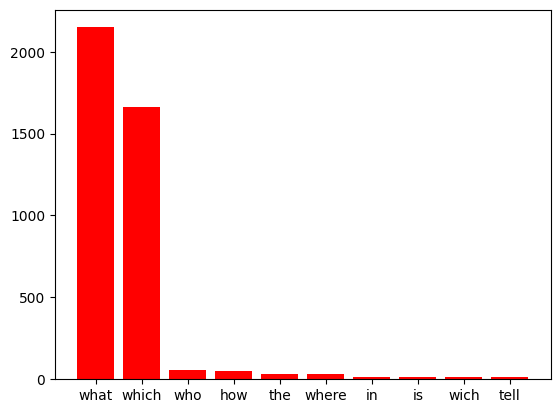

In [94]:
DataTypeStringTopXDict = convertTupToDict(topXOfList(mostFreqType(data, 'string'), 10))

plt.bar(list(DataTypeStringTopXDict.keys()),list(DataTypeStringTopXDict.values()), color='r')
plt.show()

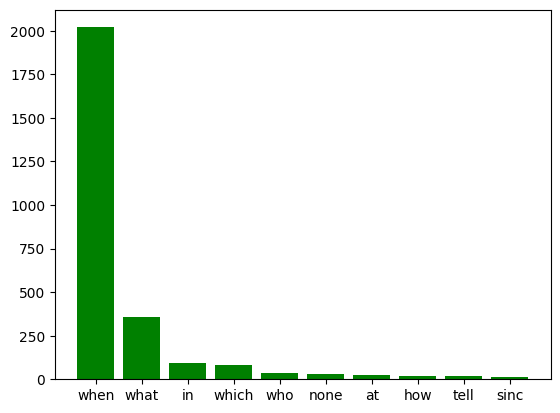

In [96]:
DataTypeDateTopXDict = convertTupToDict(topXOfList(mostFreqType(data, 'date'), 10))

plt.bar(list(DataTypeDateTopXDict.keys()),list(DataTypeDateTopXDict.values()), color='g')
plt.show()

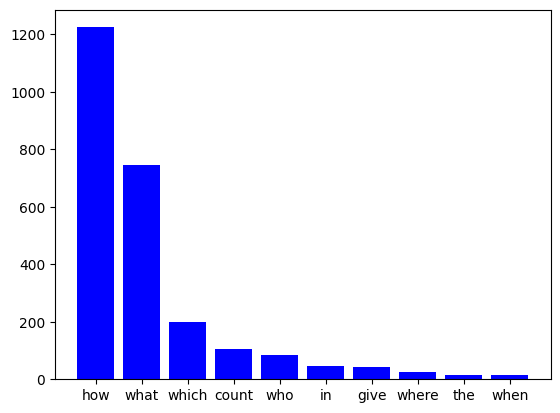

In [97]:
DataTypeNumTopXDict = convertTupToDict(topXOfList(mostFreqType(data, 'number'), 10))

plt.bar(list(DataTypeNumTopXDict.keys()),list(DataTypeNumTopXDict.values()), color='b')
plt.show()